<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

## 15.3 Application Aspects and Examples of PCA
We will now explain the steps required in Python to perform a PCA for the MNIST
dataset.

In [10]:
from mdsdata import load_MNIST_digits

X, y = load_MNIST_digits()

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (60000, 28, 28)
y.shape: (60000,)


Now, center the 60,000 training images. For this, we start by converting each image into a 1D array:

In [11]:
X = X.reshape(-1, 28 * 28)  # create image vector from 28x28 imgages

mu = X.mean(axis=0)         # mean for each column 
X = X - mu                  # center each column of X

As an optional step the features of the data matrix are standardized (see sec. 15.3 of the MDS book for additional comments):

In [12]:
sigma = X.std(axis=0)         # standard deviation for each column 
mask = np.isclose(sigma, 0)   # ensure that all entries of sigma are != 0
sigma[mask] = 1e-12           # and set only those to 1e-12 which are ~ 0
X = X / sigma                 # standardize X (this is optional!) 

Now, the data covariance matrix can be computed, considering that X contains features as
columns. Additionally, we obtain eigenvalues and eigenvectors:

In [13]:
data_cov = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(data_cov)

Both eigenvalues and corresponding –vectors are sorted such that the eigenvalues are
in descending order:

In [14]:
# get the indices that would sort the eigenvalues
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]    # these are column vectors!

Now we can create the matrix of the two principal components—
the first two eigenvectors—and project the data onto the first two principal components:

In [15]:
U = eigenvectors[:, :2]   # matrix of the first 2 eigenvectors
X_proj = X @ U            # perform the change of basis

Finally, visualize the results:

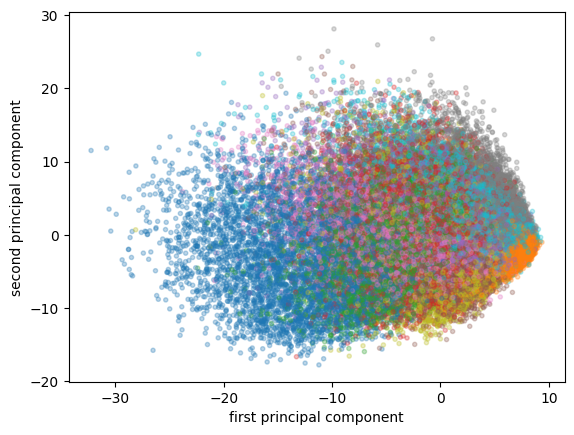

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_proj[:,0], X_proj[:,1], c=y, cmap='tab10', marker='.', alpha=0.3)
ax.set(xlabel='first principal component', ylabel='second principal component');

### 15.3.2 Accuracy of the Representation
#### Scree Plot

In [17]:
cumsum_eigenvalues = 100 * np.cumsum(eigenvalues) / np.sum(eigenvalues)

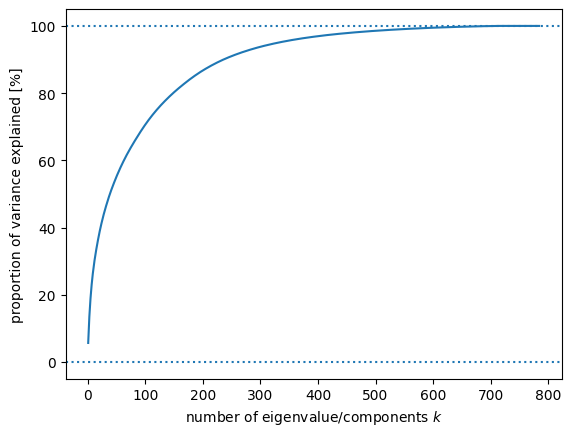

In [29]:
fig, ax = plt.subplots()
ax.axhline(0, ls=':')
ax.axhline(100, ls=':')
ax.plot(np.arange(1, cumsum_eigenvalues.size + 1), cumsum_eigenvalues)
ax.set(xlabel='number of eigenvalue/components $k$', 
       ylabel='proportion of variance explained [%]');